<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

In [ ]:
!pip install preliz
!pip install bambi

  Using cached preliz-0.15.0-py3-none-any.whl.metadata (6.1 kB)
Using cached preliz-0.15.0-py3-none-any.whl (517 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import preliz as pz
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

polynomials work better if you're trying to capture a complex relationship in your data. for the bikes dataset, using a polynomial improved the fit because we knew all the possible inputs (hours 0 to 23), so overfitting (matching the data too well) was less of a concern

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

including a polynomial element tends to make your model overfit the data and predicting poorly if we use too high of a degree. in general, we should assume that a simpler model is better because it runs faster, is easier to interpret, and helps prevent overfitting

**Task3**:

What's the point of using b splines?

It's basically a piecewise polynomial function. b splines offer the flexibility of polynomial regression, with less overfitting than using pure polynomial regression. it allows you to split your x axis into pieces and use a polynomial regression to fit the data in each piece, then applying weights to those polynomials.

to quote the notes, "splines are good at choosing the weights of a set number of polynomials regressions (knots) in a set location."

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A GP is a way of modeling/predicting a continuous function where a knot is applied to every single data value in order to find a relationship between them, and use that relationship to predict unknown points
(knots are the median x value of each piece of the spline, basically where it changes behavior)

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [ ]:
#degree 4 polynomial model
model_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell)
idata_poly_3 = model_poly_3.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


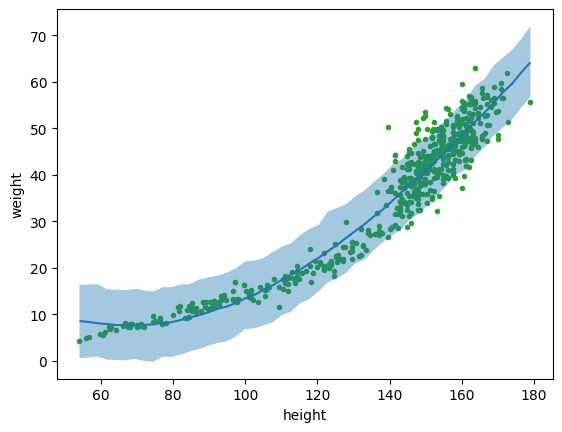

In [ ]:

bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

<Axes: xlabel='weight'>

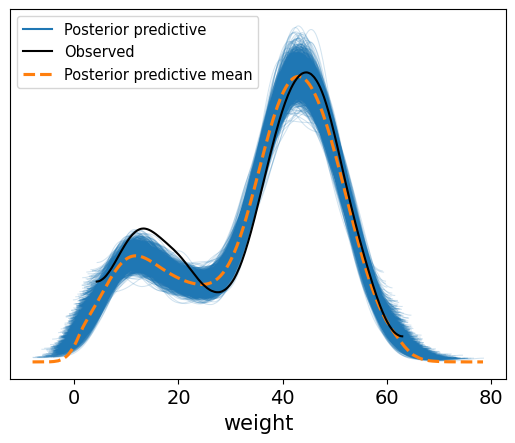

In [ ]:

model_poly_3.predict(idata_poly_3, kind="response")
az.plot_ppc(idata_poly_3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

One thing I learned is that you can use a changepoint covariance function in your GP to create smoother transitions between your changepoints. Changepoints are used to indicate locations where the prediction distribution of the dataset changes. In the ice core CO2 example, the changepoints were set at years where major events occured that altered CO2 emissions. Adding changepoints and using a covariance function (to make gradual transitions) makes your model predictions look more realistic.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I like the graph of the changepoint covariance model because it's nice to look at. The blue prediction lines align with the data points nicely and gives more nuanced predictions at the tail showing that CO2 could increase at a faster rate than before and could also possibly start to decrease after the 21st century